In [1]:
# import sys
# !{sys.executable} -m pip install librosa
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install scikeras

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = np.load('X_data_mfcc_instruments_2.npy')
labels = np.load('y_data_mfcc_instruments_2.npy')

In [4]:
data.shape

(2326, 259, 20)

In [5]:
labels.shape

(2326,)

In [6]:
data

array([[[-3.5279758e+02,  1.4267026e+02,  1.2729576e+01, ...,
          1.3398612e+01,  1.2357083e+01,  6.8404837e+00],
        [-3.9222095e+02,  1.6613428e+02,  1.2672653e+01, ...,
          1.0978334e+01,  1.2699558e+01,  1.0341391e+01],
        [-4.6669827e+02,  2.1542868e+02,  1.0249859e+01, ...,
          8.5432148e+00,  1.1446810e+01,  1.4004631e+01],
        ...,
        [-4.0371115e+02,  2.4518118e+02, -7.7565581e-01, ...,
          7.2429454e-01,  2.1521106e+00, -3.5039546e+00],
        [-3.8886307e+02,  2.3748221e+02,  5.1371851e+00, ...,
         -1.0515672e+00, -3.2681460e+00, -3.4180870e+00],
        [-3.3814093e+02,  1.8369177e+02,  2.1141911e+01, ...,
          2.9324210e+00,  1.0760670e+00, -6.1945862e-01]],

       [[-4.1614960e+02,  2.0125418e+02, -1.0407936e+01, ...,
          5.5178499e+00,  3.4885254e+00, -2.1165574e+00],
        [-3.8257022e+02,  2.2565298e+02, -1.7288475e+01, ...,
          2.6512313e+00, -7.5089347e-01, -2.0109739e+00],
        [-3.8295926e+02, 

In [7]:
labels

array(['piano', 'piano', 'piano', ..., 'cello', 'cello', 'cello'],
      dtype='<U15')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(1860, 259, 20)

In [10]:
y_train.shape

(1860,)

In [11]:
X_test.shape

(466, 259, 20)

In [12]:
y_train

array(['piano', 'violin', 'violin', ..., 'violin', 'violin', 'violin'],
      dtype='<U15')

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_enc = label_encoder.fit(y_train)

In [14]:
label_encoder.classes_

array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype='<U15')

In [15]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [16]:
y_train

array([2, 3, 3, ..., 3, 3, 3])

In [17]:
y_train

array([2, 3, 3, ..., 3, 3, 3])

In [18]:
label_encoder.classes_

array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype='<U15')

In [19]:
num_labels = len(label_encoder.classes_)
num_labels

4

In [20]:
X_train[0]

array([[-289.9158   ,  188.5745   ,    5.556422 , ...,    1.1980944,
           3.6273947,   -2.3368556],
       [-314.95203  ,  215.23651  ,    3.4175532, ...,   -3.321484 ,
          -1.3101406,   -1.4105959],
       [-352.4068   ,  230.32417  ,   -2.755798 , ...,   -6.6914387,
          -6.5798097,   -2.3512344],
       ...,
       [-371.91693  ,  227.44617  ,   -6.9236164, ...,  -12.45657  ,
         -18.323086 ,   -4.857051 ],
       [-365.69025  ,  226.56859  ,   -9.299293 , ...,  -11.851763 ,
         -15.176225 ,   -4.9920087],
       [-323.65854  ,  179.23412  ,    1.1058046, ...,   -9.87701  ,
         -10.156086 ,   -5.597444 ]], dtype=float32)

In [21]:
X_train.shape

(1860, 259, 20)

In [22]:
img_height, img_width = X_train.shape[1], X_train.shape[2]
X_train_img = X_train.reshape(X_train.shape[0], img_height, img_width, 1)
X_test_img = X_test.reshape(X_test.shape[0], img_height, img_width, 1)

In [23]:
X_train_img.shape

(1860, 259, 20, 1)

In [24]:
y_train

array([2, 3, 3, ..., 3, 3, 3])

In [25]:
y_train.shape

(1860,)

In [26]:
# models

In [27]:
from datetime import datetime 

In [28]:
from keras import backend as keras_backend
from keras.models import Sequential, load_model
from keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.regularizers import l2

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Dropout
from scikeras.wrappers import KerasClassifier

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [32]:
display_labels = label_encoder.classes_
display_labels

array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype='<U15')

In [33]:
# cnn

In [34]:
# !pip install hyperopt --user

In [37]:
def getModel():
    model = Sequential()
    model.add(Input(shape=(img_height, img_width, 1)))
    model.add(Conv2D(32, 3, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [38]:
num_epochs = 10
num_batch_size = 32

model_cnn = KerasClassifier(model=getModel, verbose=1, optimizer='adam', loss='sparse_categorical_crossentropy',epochs=num_epochs, batch_size=num_batch_size, metrics=['accuracy'])

In [39]:
model_cnn

KerasClassifier(
	model=<function getModel at 0x175884a60>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=sparse_categorical_crossentropy
	metrics=['accuracy']
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [40]:
start = datetime.now()

final_model_cnn = model_cnn.fit(X_train_img, y_train, validation_data=(X_test_img, y_test), verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

2024-02-04 13:35:50.368986: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-04 13:35:50.369012: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-04 13:35:50.369019: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-04 13:35:50.369050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 13:35:50.369063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-02-04 13:35:50.963774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - 3s 30ms/step - loss: 1.4466 - accuracy: 0.5312 - val_loss: 2.8640 - val_accuracy: 0.3476
Epoch 2/10
59/59 [==============================] - 1s 19ms/step - loss: 0.9432 - accuracy: 0.6462 - val_loss: 0.9031 - val_accuracy: 0.6545
Epoch 3/10
59/59 [==============================] - 1s 20ms/step - loss: 0.8126 - accuracy: 0.6930 - val_loss: 0.8655 - val_accuracy: 0.6481
Epoch 4/10
59/59 [==============================] - 1s 21ms/step - loss: 0.6497 - accuracy: 0.7629 - val_loss: 0.8148 - val_accuracy: 0.7017
Epoch 5/10
59/59 [==============================] - 1s 20ms/step - loss: 0.6047 - accuracy: 0.7812 - val_loss: 0.7796 - val_accuracy: 0.6888
Epoch 6/10
59/59 [==============================] - 1s 21ms/step - loss: 0.5051 - accuracy: 0.8091 - val_loss: 0.9204 - val_accuracy: 0.6674
Epoch 7/10
59/59 [==============================] - 1s 20ms/step - loss: 0.4891 - accuracy: 0.8177 - val_loss: 0.8448 - val_accuracy: 0.6996
Epoch 8/10
59/59 [======

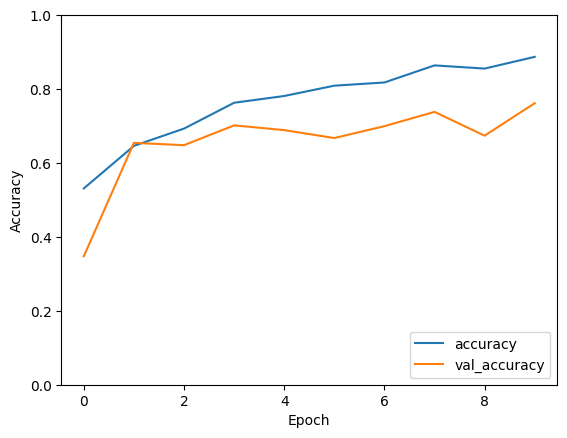

In [41]:
plt.plot(final_model_cnn.history_['accuracy'], label='accuracy')
plt.plot(final_model_cnn.history_['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [42]:
# train

In [43]:
from sklearn.model_selection import cross_val_score

cv_score_cnn_train = cross_val_score(final_model_cnn, X_train_img, y_train, cv=5, scoring="accuracy", verbose=0)
cv_score_cnn_train

Epoch 1/10
47/47 [==============================] - 2s 22ms/step - loss: 1.5864 - accuracy: 0.5155
Epoch 2/10
47/47 [==============================] - 1s 18ms/step - loss: 0.9578 - accuracy: 0.6337
Epoch 3/10
47/47 [==============================] - 1s 19ms/step - loss: 0.7427 - accuracy: 0.7177
Epoch 4/10
47/47 [==============================] - 1s 19ms/step - loss: 0.6781 - accuracy: 0.7265
Epoch 5/10
47/47 [==============================] - 1s 20ms/step - loss: 0.5639 - accuracy: 0.7910
Epoch 6/10
47/47 [==============================] - 1s 18ms/step - loss: 0.4727 - accuracy: 0.8212
Epoch 7/10
47/47 [==============================] - 1s 19ms/step - loss: 0.4591 - accuracy: 0.8253
Epoch 8/10
47/47 [==============================] - 1s 19ms/step - loss: 0.3914 - accuracy: 0.8555
Epoch 9/10
47/47 [==============================] - 1s 19ms/step - loss: 0.3285 - accuracy: 0.8750
Epoch 10/10
12/12 [==============================] - 0s 9ms/step
Epoch 1/10
47/47 [==========================

array([0.74462366, 0.73924731, 0.73387097, 0.72580645, 0.74193548])

In [44]:
print('Accuracy CNN Train:', cv_score_cnn_train.mean())

Accuracy CNN Train: 0.7370967741935484


Epoch 1/10
47/47 [==============================] - 2s 25ms/step - loss: 1.4680 - accuracy: 0.5148
Epoch 2/10
47/47 [==============================] - 1s 20ms/step - loss: 0.9232 - accuracy: 0.6445
Epoch 3/10
47/47 [==============================] - 1s 19ms/step - loss: 0.7472 - accuracy: 0.7144
Epoch 4/10
47/47 [==============================] - 1s 20ms/step - loss: 0.6531 - accuracy: 0.7755
Epoch 5/10
47/47 [==============================] - 1s 18ms/step - loss: 0.5223 - accuracy: 0.8112
Epoch 6/10
47/47 [==============================] - 1s 18ms/step - loss: 0.4778 - accuracy: 0.8185
Epoch 7/10
47/47 [==============================] - 1s 18ms/step - loss: 0.3626 - accuracy: 0.8649
Epoch 8/10
47/47 [==============================] - 1s 18ms/step - loss: 0.3391 - accuracy: 0.8858
Epoch 9/10
47/47 [==============================] - 1s 17ms/step - loss: 0.2700 - accuracy: 0.9093
Epoch 10/10
12/12 [==============================] - 0s 8ms/step
Epoch 1/10
47/47 [==========================

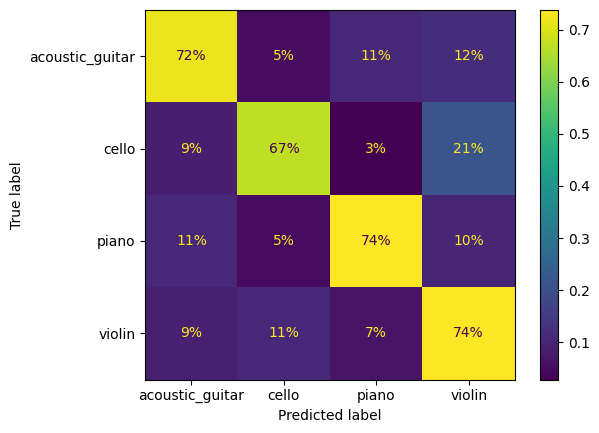

In [45]:
y_train_pred_cnn = cross_val_predict(final_model_cnn, X_train_img, y_train, cv=5, verbose=0)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_cnn, normalize="true", values_format=".0%", display_labels=display_labels)
plt.show()

In [46]:
# test

In [47]:
cv_score_cnn_test = cross_val_score(final_model_cnn, X_test_img, y_test, cv=5, scoring="accuracy", verbose=0)
cv_score_cnn_test

Epoch 1/10
12/12 [==============================] - 2s 64ms/step - loss: 1.6093 - accuracy: 0.4946
Epoch 2/10
12/12 [==============================] - 0s 26ms/step - loss: 0.9963 - accuracy: 0.6801
Epoch 3/10
12/12 [==============================] - 0s 24ms/step - loss: 0.9652 - accuracy: 0.7097
Epoch 4/10
12/12 [==============================] - 0s 19ms/step - loss: 0.5995 - accuracy: 0.7715
Epoch 5/10
12/12 [==============================] - 0s 22ms/step - loss: 0.5100 - accuracy: 0.8226
Epoch 6/10
12/12 [==============================] - 0s 20ms/step - loss: 0.4164 - accuracy: 0.8387
Epoch 7/10
12/12 [==============================] - 0s 21ms/step - loss: 0.2896 - accuracy: 0.8978
Epoch 8/10
12/12 [==============================] - 0s 20ms/step - loss: 0.3070 - accuracy: 0.8737
Epoch 9/10
12/12 [==============================] - 0s 20ms/step - loss: 0.2348 - accuracy: 0.9194
Epoch 10/10
3/3 [==============================] - 0s 37ms/step
Epoch 1/10
12/12 [===========================

array([0.4893617 , 0.6344086 , 0.55913978, 0.64516129, 0.67741935])

In [48]:
print('Accuracy CNN Test:', cv_score_cnn_test.mean())

Accuracy CNN Test: 0.6010981468771448


Epoch 1/10
12/12 [==============================] - 2s 57ms/step - loss: 1.6516 - accuracy: 0.4677
Epoch 2/10
12/12 [==============================] - 0s 25ms/step - loss: 0.9393 - accuracy: 0.6720
Epoch 3/10
12/12 [==============================] - 0s 20ms/step - loss: 0.6611 - accuracy: 0.7285
Epoch 4/10
12/12 [==============================] - 0s 23ms/step - loss: 0.4821 - accuracy: 0.8280
Epoch 5/10
12/12 [==============================] - 0s 21ms/step - loss: 0.4115 - accuracy: 0.8468
Epoch 6/10
12/12 [==============================] - 0s 19ms/step - loss: 0.3155 - accuracy: 0.8656
Epoch 7/10
12/12 [==============================] - 0s 20ms/step - loss: 0.2891 - accuracy: 0.8925
Epoch 8/10
12/12 [==============================] - 0s 20ms/step - loss: 0.1648 - accuracy: 0.9489
Epoch 9/10
12/12 [==============================] - 0s 21ms/step - loss: 0.1941 - accuracy: 0.9301
Epoch 10/10
3/3 [==============================] - 0s 36ms/step
Epoch 1/10
12/12 [===========================

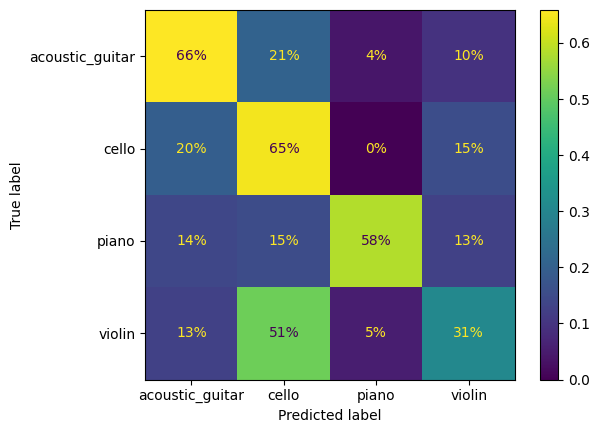

In [49]:
y_test_pred_cnn = cross_val_predict(final_model_cnn, X_test_img, y_test, cv=5, verbose=0)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_cnn, normalize="true", values_format=".0%", display_labels=display_labels)
plt.show()

In [50]:
model_name = 'CNN'
average = 'macro'
print(f'Accuracy {model_name}:', accuracy_score(y_test, y_test_pred_cnn))
print(f'Precision {model_name}:', precision_score(y_test, y_test_pred_cnn, average=average))
print(f'F1 score {model_name}:', f1_score(y_test, y_test_pred_cnn, average=average))
print(f'Recall score {model_name}:', recall_score(y_test, y_test_pred_cnn, average=average))

Accuracy CNN: 0.5472103004291845
Precision CNN: 0.5648690175501923
F1 score CNN: 0.5295809743030946
Recall score CNN: 0.5488005674981963


In [52]:
re = classification_report(y_test, y_test_pred_cnn, target_names=display_labels)

print(re)

                 precision    recall  f1-score   support

acoustic_guitar       0.62      0.66      0.64       126
          cello       0.30      0.65      0.41        71
          piano       0.89      0.58      0.70       158
         violin       0.44      0.31      0.36       111

       accuracy                           0.55       466
      macro avg       0.56      0.55      0.53       466
   weighted avg       0.62      0.55      0.56       466

